In [1]:
#%matplotlib notebook
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2

import os
import os.path as path
import wget

In [2]:
if not path.exists('Data'):
    os.mkdir('Data')
    
!rm Data/*

file = 'Data/Minimos.dat'
#url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosLineal.txt'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosCuadratico.txt'

if not path.exists(file):
    Path_ = wget.download(url,file)
    print('File loaded')
else:
    Path_ = file

100% [..................................................................................] 521 / 521File loaded


In [3]:
data = np.loadtxt(Path_)
x = data[:,0]
y = data[:,1]

In [4]:
# Agregamos ruido
N = len(x)
sigma = np.random.uniform(0,20.,size=N)
sigma

array([ 6.89296469,  4.51454732, 12.08985854,  9.41022547,  5.04127487,
       10.52816879,  4.77160222,  0.27397566, 16.1264274 , 16.65660628,
        8.0587583 ,  8.93645628, 10.33612232,  8.39021993,  0.83896515,
       16.6510207 , 13.30518703, 12.02472439, 10.30061739, 15.35364882])

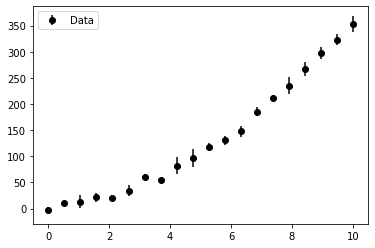

In [5]:
#plt.scatter(x,y)
plt.errorbar(x,y,yerr=sigma,fmt='o',color='k',label='Data')
plt.legend(loc=0)

In [6]:
def GetFit(x,y,n=1):
    
    l = x.shape[0]
    b = y
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    AT = np.dot(A.T,A)
    bT = np.dot(A.T,b)

    xsol = np.linalg.solve(AT,bT)
    
    return xsol

In [7]:
# Grado polinomial
n = 5
param = GetFit(x,y,n)
param

array([-1.50605855e-01,  9.53277250e+00,  2.06614775e+00, -1.71529601e-01,
        5.99163451e-02, -3.77282827e-03])

In [8]:
def GetModel(x,p):
    
    y = 0.
    for i in range(len(p)):
        y += p[i]*x**i
        
    return y

In [9]:
X = sym.Symbol('x',real=True)
GetModel(X,param)

-0.00377282826618552*x**5 + 0.0599163450572589*x**4 - 0.171529600935282*x**3 + 2.06614774759259*x**2 + 9.53277250111673*x - 0.150605854889703

In [10]:
_x = np.linspace(np.min(x),np.max(x),50)
_y = GetModel(_x,param)

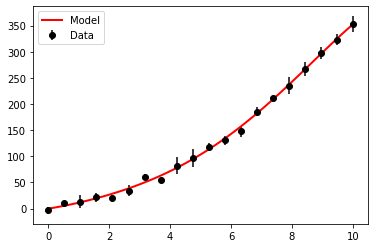

In [11]:
plt.errorbar(x,y,yerr=sigma,fmt='o',color='k',label='Data')
plt.plot(_x,_y,color='r',lw=2,label='Model')
plt.legend()